Here we're looking at life satisfaction and happiness which varies widely both within and among countries. We're using the United Nations' <a href="https://worldhappiness.report/ed/2020/#read">World Happiness Report</a> . More background is provided there and <a href="https://worldhappiness.report/ed/2019/changing-world-happiness/">here</a> to get a better understanding of the data. The <a href="https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv">CSV files</a> are provided at Kaggle.

Whenever fresh data is obtained, to get to its essence one of the first tasks is to summarise it with descriptive statistics like max, min, sum and median which help in providing readings into its properties. Employing aggregations in Pandas and using the concept of groupby we'll summarise across three datasets in order to ask questions like 'did world happiness increase, decrease, or stay about the same from 2015 to 2017? 

In [176]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [185]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

#combine dataframes vertically- (along axis0) , horizontally- axis1
# dataframes to combine passed in as list, pd used to access concat()
concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

#Assign the number of rows in concat_axis0 & 1 to variables
question1 = 6
question2 = 3

In [192]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880


In [193]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


<h2>Combining Data in Pandas with concat( ) and merge( )</h2>

pd.merge is inner join by default and cannot combine more than 2 df at once and only 
horizontally:
pd.merge(df1, df2, left_index=True, right_index=True)

Merge (Join on Columns)
merge(left = df1, right = df2, how = 'join_type', on = 'Col')

Merge (Join on Index)
merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)

pd.concat is outer join by default and can combine more than 2 df at once:
pd.concat([df1,df2,df3], axis=1)
both vertically(axis=0) or - horizontally (axis=1)


In [224]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

#pd.concat combines head_2015 and head_2016 along axis = 0 
# with ignore_index=True it clears the existing index and resets it in the result
#                        concatenate dataframes vertically (axis=0)
concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True, sort=True)

#confirm the index was reset
concat_update_index

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


Next we'll use merge() which unlike concat ,can only combine dataframes horizontally (axis=1) and only two at a time,  merge() has two required arguments 1.the left dataframe 2.the right df.
 merge() is useful when you want to combine rows that share data. We'll combine dataframes on one or more keys, shared index or column. Keys create a link from one dataframe to another using the common values or indexes. We'll choose keys with unique values to avoid duplicating data.

In a many-to-one join, one dataset will have many rows in the merge column with some duplicates (1, 1, 3, 5, 5), while the merge column in the other dataset will not (1, 3, 5). While in a many-to-many join, both merge columns have duplicates.

In [204]:
"""  Uses pd.merge() to join variables three_2015 and
    three_2016 (3 rows each) on the Country column and assigns result to merged.
"""

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
#  on='Country' is column name to join df on
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

In [201]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


Since we joined the dataframes on the Country column/ used it as the key, the merge() function looked to match elements in the Country column in both dataframes and since only Norway matched only 1/3 rows got returned.This join type is called an inner join and it only returns the intersection of the keys; the elements that appear in both dataframes with a common key.

The concat function, is by default a full join aka outer join since it selected all elements from df A and df B, regardless of whether the join condition was met and so missing values were created. 

In [211]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')

#use the suffixes _2015 and _2016
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country',
                           suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', on='Country',
                                   suffixes=('_2016', '_2015'))
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [213]:
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


 <h3>LEFT JOIN</h3>

We see that the left join merges on country as the common key and returns all rows from the left dataframe and the matching rows from the right, but when no matching rows are found in the right table, NaN(None value for a number) are used.


Since the Country column was used as the key, only countries that appear in both dataframes have a value in every column. Norway was the only value in the Country column in both dataframes, so it's the only row with a value in every column. So we use a left join when we when we want every row from the left, regardless of whether there is a matching row in the right.

<h3>Merge dataframes by index</h3>
Now we'll join happiness2015 and happiness2016 on their indices.

In [216]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

#use a left join to combine four_2015 and three_2016
merge_index = pd.merge(left = four_2015,right = three_2016, 
                       left_index = True, right_index = True, suffixes = ('_2015','_2016'))

#assigns the number of rows to a variable - rows 
#column number - columns
rows = 4
columns = 6

# how='left' -----    changes the join type of merge() to a left join
# since merge() is inner join by default
merge_index_left = pd.merge(left=four_2015, right=three_2016, how='left', 
                            left_index=True, right_index=True, suffixes=('_2015','_2016'))

In [215]:
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


We see that since we joined on index, the result contains only common indexes.

Now we'll create a bar plot in which each bar represents the mean happiness score for one of the years to answer:
<h4>Did world happiness increase, decrease, or stay about the same from 2015 to 2017?</h4>

In [217]:
#First, let's rename the Happiness.Score column so it matches the column name in 
#happiness2015 and happiness2016
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

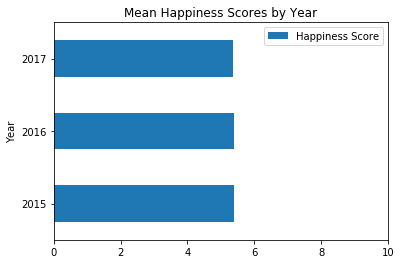

In [223]:
# Now we'll group the data by the Year column
# so we need to combine all 3 df to group the result by Year col 
# and we need to combine the data vertically 
# in order to create a dataframe that can be grouped by year
# so use concat which is outer join by default and
# vertically(axis=0) is the default
combined = pd.concat([happiness2015, happiness2016, happiness2017],sort=True)

#Uses df.pivot_table() to create a pivot table from the combined dataframe. 
#Sets Year 
#as the index and Happiness Score as the values.
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', 
                                            aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', 
                          xlim=(0,10))

The mean happiness stayed roughly the same.

<h3>mean happiness for 2015 by region </h3>
We can use the Series.unique() method to confirm the unique regions:

In [186]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

We'll see what it's like with only one region:

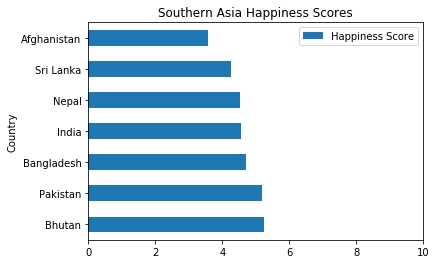

In [65]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', 
             title='Southern Asia Happiness Scores', xlim=(0,10))

Now we have labels and values, but do not know whether the South Asia is representative of the world unless we got other regions too. Therefore we'll create a vis to find the mean happiness score for each region, as this is a summary for each region's data.

In [66]:
"""
    Empty dictionary -- mean_happiness the data structure that shall store results.
    Series.unique() creates an array of unique values for the Region column.
    unique region values from the Region column are iterated.
        rows belonging to the current region get assigned to region_group variable.
        Series.mean() is used to calculate the mean happiness score for region_group.
        The mean value gets assigned to mean_happiness dictionary, 
        using the region name as the key and the mean happiness score as the value.
"""
#Define an empty dictionary that shall contain region_mean data 
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    # Splitting: df Region column into groups, by applying == condition
    region_group = happiness2015[happiness2015['Region'] == r]
    # Applying: the mean function to each group independently
    region_mean = region_group['Happiness Score'].mean()
    # Combining the different groups into a data structure.
    mean_happiness[r] = region_mean

Check dataframe's number of regions and unique values in each region

In [67]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


Now we'll use Pandas GroupBy to create a grouping of unique value into categories and apply a function to the categories. It’s widely used in data science when aggregating large amounts of data. Let's create a Groupby object and group the dataframe by the Region column:

In [68]:
print(happiness2015.groupby('Region'))

In [84]:
#groupby region col assign result to grouped var
grouped = happiness2015.groupby('Region')

#get_group() - construct DataFrame from group with provided name.
#method used to select data only for Australia and New Zealand group
aus_nz = grouped.get_group('Australia and New Zealand')

we = grouped.get_group('Western Europe').set_index('Happiness Rank').head()

lac = grouped.get_group('Latin America and Caribbean').set_index('Happiness Rank').head()

we

,Unnamed: 0,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,,
1,0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
6,5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


We now use the GroupBy object's groups attributes - GroupBy.groups - which is a dict, whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group, to get more information about the GroupBy object.

In [70]:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

The values include the index for each row in the original dataframe with the corresponding region name. To prove this, let's look at the data for the Australia and New Zealand group, by filtering on indexes 8 and 9:

In [71]:
happiness2015.iloc[8:10]

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [72]:
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [73]:
#Calculate mean of groups/Series
means = grouped.mean()
means

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,8.500000,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,78.034483,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,63.500000,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,45.909091,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,76.600000,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980008
North America,9.000000,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,80.222222,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,112.142857,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,126.900000,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


From the above Region appears in a different row than the rest of the column names, since we grouped the dataframe by region, the unique values in Region are used as the index.

<h4>Column indexing</h4>
The GroupBy object supports column indexing and returns a modified GroupBy object. So we'll aggregate just one column, using column indexing with GroupBy. We'll only select the Happiness Score column from grouped, then assign the result to happy_grouped.
Then use GroupBy.mean() to compute the mean of happy_grouped.

In [88]:
grouped = happiness2015.groupby('Region')
#select Series group from the DataFrame's GroupBy object by reference to its column name
happy_grouped = grouped['Happiness Score']
#call mean aggregate on the object
happy_mean = happy_grouped.mean()

To apply multiple aggregations to a column we shall use <a href="https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html">GroupBy.agg()</a>

In [95]:
"""
    Applies the GroupBy.agg() method to happy_grouped. 
    Pass a list containing np.mean and np.max into the method. 
    Assign the result to happy_mean_max.
    
    custom function named dif calculates 
    the difference between the mean and maximum values. 
    dif is passed into GroupBy.agg() with result to mean_max_dif.
"""


import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())
#Aggregate using list of functions
happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

In [96]:
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [97]:
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [110]:
#groupby(index)[values]
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [112]:
#Create a spreadsheet-style pivot table as a DataFrame
#levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) 
#on the index and columns of the result DataFrame.
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


Now we'll use aggregation by pandas df.pivot_table() in our data analysis, it is the same aggregation as earlier and the method returns a df. The default parameter of pivot_table's aggfunc is mean,so the fields in the resulting dataframe have the average of happiness scores by region.

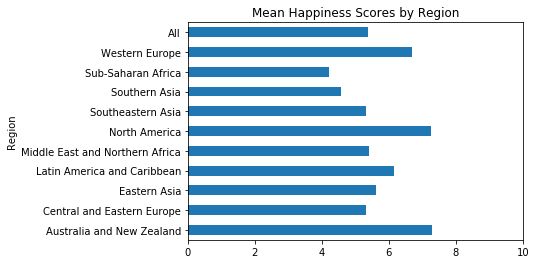

In [120]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region',
                                         aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region',
                  legend=False)
world_mean_happiness = happiness2015['Happiness Score'].mean()

By setting the margins parameter to True, the All column gets added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. Here, All is the mean of the Happiness Score column.




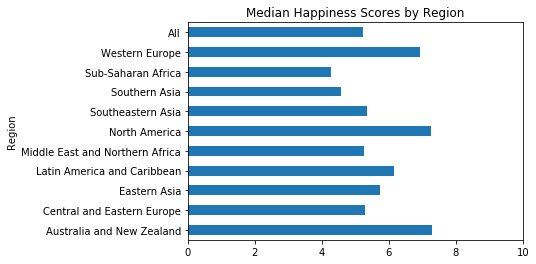

In [122]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region',
                                         aggfunc=np.median, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Median Happiness Scores by Region',
                  legend=False)

In [149]:

""" call .groupby() and pass the name of the column - 'Region' to group on, 
    ['Happiness Score','Family'] to specify the columns
    to perform the actual aggregation.
    Then aggregation functions [np.min, np.max,np.mean] passed in as list and
    called on grouped var
    
    By contrast
    pivot_table method returns the same information, 
    -----calculates the the minimum,
    maximum and mean for the Family and Happiness Score columns,
    with the margins=True get All row
    """
#      Split the data into groups based on columns, group by Region 
#     >1 column specified so DataFrameGroupBy instance returned
#     columns specified before the aggregate functions applied

            # provide the column names as a list to the column selection
    # find min,max,mean on a regional basis
hf= happiness2015.groupby('Region')[['Happiness Score','Family']].agg([np.min, np.max, np.mean])

#  Aggregate 2 columns, broken out by Region and find min,max,mean of family and score cols
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'],
                                                  'Region', aggfunc=[np.min, np.max, np.mean],
                                                  margins=True)

In [127]:

pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

In [145]:
hf

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302